In [1]:
import os 
import cv2
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# path to the dataset
data_path = 'D:/Datasets/animal_pics/mammals2'

#folder names- class names of animals
class_names = sorted(os.listdir(data_path))

# Counting the number of classes
num_classes = len(class_names)

print("Class Names: \n", class_names)
print("Number of Classes:", num_classes)

Class Names: 
 ['american_bison', 'arctic_fox', 'dogs']
Number of Classes: 3


In [3]:
#getting the number of images in the classes
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_path + "/" + name))
    class_sizes.append(class_size)
    
# printing the class distribution
print("Class Distribution:\n", class_sizes)

Class Distribution:
 [323, 315, 310]


In [4]:
#displaying the distribution
data = go.Pie(labels=class_names, values=class_sizes)
layout = go.Layout(title={"text": "Class Distribution", "x": 0.5})
fig = go.Figure(data=data, layout=layout)
fig.show()

In [5]:
#pre processing the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  
    image = image / 255.0  
    return image


In [6]:
X = []
y = []
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = preprocess_image(image_path)
        X.append(image)
        y.append(i)

Splitting the dataset

In [7]:
X = np.array(X)
y = np.array(y)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [8]:
#model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    rescale=1./255  
)
train_datagen.fit(X_train)

In [11]:
#storing the training data
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=10,
                    verbose=1)

Epoch 1/10
21/21 [==============================] - 107s 4s/step - loss: 1.4971 - accuracy: 0.3183 - val_loss: 5.7515 - val_accuracy: 0.4648
Epoch 2/10
21/21 [==============================] - 88s 4s/step - loss: 1.1940 - accuracy: 0.3529 - val_loss: 5.2125 - val_accuracy: 0.3380
Epoch 3/10
21/21 [==============================] - 111s 5s/step - loss: 1.1014 - accuracy: 0.3379 - val_loss: 4.6411 - val_accuracy: 0.3380
Epoch 4/10
21/21 [==============================] - 82s 4s/step - loss: 1.0975 - accuracy: 0.3333 - val_loss: 5.8820 - val_accuracy: 0.3239
Epoch 5/10
21/21 [==============================] - 105s 5s/step - loss: 1.1005 - accuracy: 0.3288 - val_loss: 7.6340 - val_accuracy: 0.3239
Epoch 6/10
21/21 [==============================] - 101s 5s/step - loss: 1.0968 - accuracy: 0.3454 - val_loss: 9.7362 - val_accuracy: 0.3239
Epoch 7/10
21/21 [==============================] - 106s 5s/step - loss: 1.0980 - accuracy: 0.3484 - val_loss: 12.3296 - val_accuracy: 0.3239
Epoch 8/10
21/

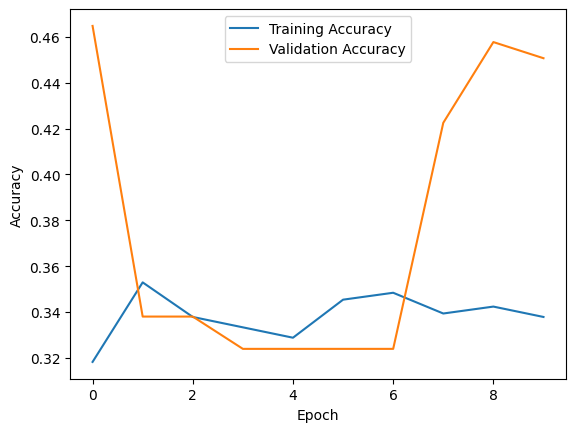

In [12]:
# Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

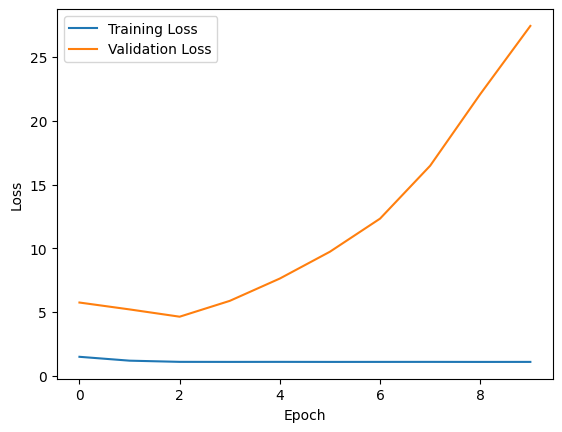

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 26.92743682861328
Test Accuracy: 0.42657342553138733


In [15]:
y_pred = model.predict(X_test)
# Converting one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Calculating MSE
mse = mean_squared_error(y_test, y_pred_labels)
print("Mean Squared Error:", mse)

5/5 [==============================] - 3s 400ms/step
Mean Squared Error: 1.2447552447552448
